# MS 263 Data Analysis Final Project

## Introduction

In November and December of 2014, Dr. Amanda Kahn and colleagues executed a series of ROV dives located west of Vancouver, BC in the Strait of Georgia over the Fraser Ridge Reef (Fig. 1). This location was of specific interest because it is the home to a glass sponge reef. Glass sponges are a class of sponges that are made of four- and six-sided spicules made of silica. They are extremely fragile and the only known reefs exist off the coast of British Columbia and Washington. Prior to their discovery in 1987, sponge reefs were thought to have gone extinct during the Jurassic period (Conway et al., 1991). Sponges are filter feeders and their presence in dense numbers acts to slow currents in the water column. This causes sediment to fall out of the water column and build up around the reef, providing habitat and protection for marine organisms (Krautter et al., 2006). Because of their importance and rarity, Dr. Kahn was curious how the water quality above these reefs changes compared to the water surrounding the reefs. Sponges intake water through the ostia located throughout their body and expel it vertically through the osculum after filtering out food. As a product of this process, the water above sponge reefs is likely to differ in its characteristics from water that is not filtered. Because of the importance of sponge reefs for other organisms, knowing the quality of the water above the reef can have implications for species health and composition. 

In order to answer the question of whether or not water characteristics differ over glass sponge reefs, data from the ROV dives mentioned above can be compared, since some of the  transects followed were over glass sponge reefs while others were not. The ROV dives output three different sets of data. There were dive annotations, which gave qualitative observations along with specific times, latitudes, longitudes, and depths at which these observations occurred. CTD data was also collected giving a specific date, time, and depth as well as water temperature, salinity, oxygen concentration, and pressure. Finally, navigation data from the ROV was also recorded, giving specific information regarding date, time, depth, latitude, longitude, and various ROV velocity and heading data. The navigation data recorded five observations per second, the CTD data recorded one observation per second, and the dive annotations were done qualitatively whenever something of note happened during the dive. In total, nine transects were executed over seven dives. 


![Data map](./datamap.png)

Figure 1. Map of the Strait of Georgia, with the red star indicating the transects' location on and around the Fraser Ridge Glass Sponge Reef.

## Methods

Transects 1, 2, 3, and 6 were above a glass sponge reef, transects 4, 5, and 8 were above sediment surrounding the reef (non-reef), and transects 7 and 9 were cross-reef transects partially going over a glass sponge reef. 

## Results

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from make_pca import make_pca
from make_plots import make_plots
from create_datasets import create_datasets

### Read in data

In [2]:
df = pd.read_csv("alltransects.csv")

### Make Figures for each transect ( How to facet by transect and on/off reef?)

In [3]:
for i in np.unique(df['transect']):
    transect_sub, oxy_interp, min_oxy, max_oxy = create_datasets(df, i, 'salinity')
    make_plots(transect_sub, oxy_interp, i, 'sal', min_oxy, max_oxy)

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist


KeyError: 'sal'

### PCA

Eigenvalues: [2.52210602 0.44185003 0.03604395]
Eigenvectors: 
 [[-0.57691993  0.57997967 -0.57514084]
 [ 0.61982411 -0.14772642 -0.7707107 ]
 [ 0.53196003  0.80112452  0.27425906]]
Variance accounted for by PC1: 84.0702005027903 %
Variance accounted for by PC2: 14.728334433655284 %


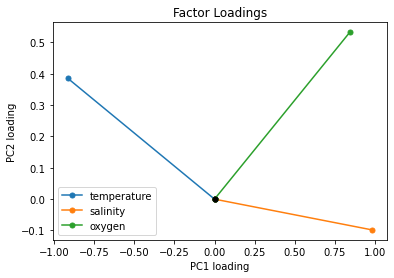

In [4]:
from make_pca import make_pca
make_pca(df, ['temp', 'salinity', 'oxygen'])

## Conclusions

Over Glass sponge reef --> less oxygen!! 

## Future Work

Further Statistical Analyses: PCA?
    How do I analyze categorical significance with a spatial dataset? like an ANOVA?

## References

Need to reference: matplotlib, scipy, numpy, pandas, physoce + papers